In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import dask.distributed as dd

import cartopy.crs as ccrs
import fv3viz
import cftime
import vcm
from vcm.cubedsphere.grid_metadata import GridMetadataScream

In [2]:
plt.rcParams["figure.dpi"] = 120

In [8]:
verif_path = "../for_diags/verification/data_2d.zarr/"
nudge_path = "../for_diags/nudged_sim/data_2d.zarr/"
old_run_path = "../for_diags/tquvRad_ml_corrected/data_2d.zarr/"
run_path = "../Corrective-ML/gpu-ml-0603.F2010-SCREAMv1.ne30pg2_ne30pg2.pm-gpu/tests/20x1_1x1_ndays_mlcorrected/run/output.scream.AVERAGE.nhours_x3.*.nc"
# run2_path = "../Corrective-ML/gpu-ml-0604.F2010-SCREAMv1.ne30pg2_ne30pg2.pm-gpu/tests/20x1_1x1_ndays_mlcorrected/run/output.scream.AVERAGE.nhours_x3.*.nc"
rad_frac_path = "../Corrective-ML/gpu-ml-0617.F2010-SCREAMv1.ne30pg2_ne30pg2.pm-gpu/tests/20x1_1x1_ndays_mlcorrected/run/output.scream.AVERAGE.nhours_x3.*.nc"

In [9]:
verif = xr.open_zarr(verif_path)
nudge = xr.open_zarr(nudge_path)
old_run = xr.open_zarr(old_run_path)

In [10]:
run = xr.open_mfdataset(run_path, coords="minimal", data_vars="minimal")
# run_pr_rad = xr.open_mfdataset(run2_path, coords="minimal", data_vars="minimal", compat="override")
run_frac_rad = xr.open_mfdataset(rad_frac_path, coords="minimal", data_vars="minimal", compat="override")
# run = xr.open_dataset(run_path)

Text(0.5, 1.0, 'Global avg. water vapor path')

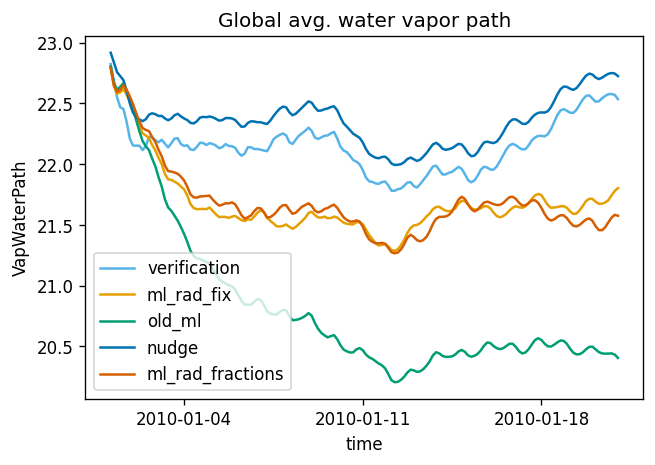

In [11]:
final_time = run.time[-1]
verif.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="verification")
run.VapWaterPath.mean(dim="ncol").plot(label="ml_rad_fix")
old_run.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="old_ml")
nudge.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="nudge")
# run_pr_rad.VapWaterPath.mean(dim="ncol").plot(label="ml_rad_pr_fix")
run_frac_rad.VapWaterPath.mean(dim="ncol").plot(label="ml_rad_fractions")
plt.legend()
plt.title("Global avg. water vapor path")

(19.0, 25.0)

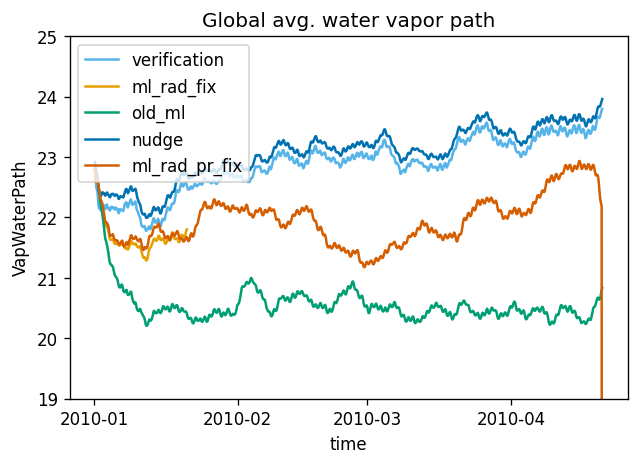

In [10]:
final_time = run_pr_rad.time[-1]
verif.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="verification")
run.VapWaterPath.mean(dim="ncol").plot(label="ml_rad_fix")
old_run.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="old_ml")
nudge.sel(time=slice(final_time)).water_vapor_path.mean(dim="ncol").plot(label="nudge")
run_pr_rad.VapWaterPath.mean(dim="ncol").plot(label="ml_rad_pr_fix")
plt.legend()
plt.title("Global avg. water vapor path")
plt.ylim(19, 25)

In [19]:
list(run.data_vars)

['time_bnds',
 'LW_flux_dn_at_model_bot',
 'LW_flux_up_at_model_bot',
 'LW_flux_up_at_model_top',
 'RelativeHumidity_at_500hPa',
 'RelativeHumidity_at_700hPa',
 'RelativeHumidity_at_850hPa',
 'SW_flux_dn_at_model_bot',
 'SW_flux_dn_at_model_top',
 'SW_flux_up_at_model_bot',
 'SW_flux_up_at_model_top',
 'SeaLevelPressure',
 'T_2m',
 'T_mid',
 'T_mid_at_200hPa',
 'T_mid_at_500hPa',
 'T_mid_at_700hPa',
 'T_mid_at_850hPa',
 'U',
 'V',
 'VapWaterPath',
 'landfrac',
 'mlcorrection_T_mid_tend',
 'mlcorrection_horiz_winds_tend',
 'mlcorrection_qv_tend',
 'omega_at_500hPa',
 'omega_at_700hPa',
 'omega_at_850hPa',
 'physics_T_mid_tend',
 'physics_horiz_winds_tend',
 'physics_qv_tend',
 'precip_ice_surf_mass_flux',
 'precip_liq_surf_mass_flux',
 'ps',
 'pseudo_density',
 'qv',
 'qv_2m',
 'sfc_alb_dif_vis',
 'surf_evap',
 'surf_radiative_T',
 'surf_sens_flux',
 'z_mid_at_500hPa',
 'avg_count_ncol',
 'avg_count_500hPa_ncol',
 'avg_count_700hPa_ncol',
 'avg_count_850hPa_ncol',
 'avg_count_ncol_lev',

(285.0, 292.5)

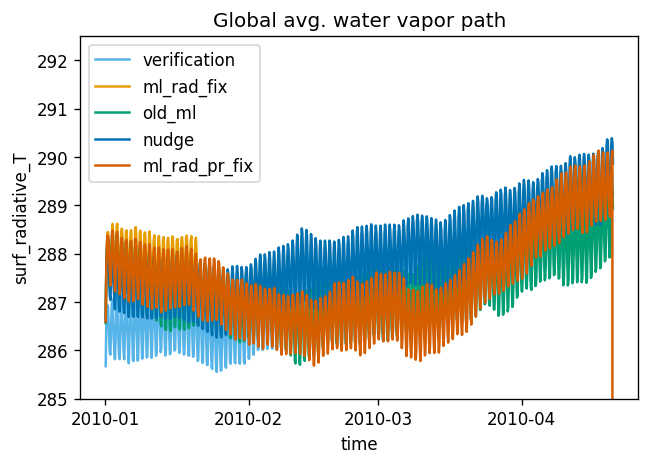

In [22]:
final_time = run_pr_rad.time[-1]
verif.sel(time=slice(final_time)).TMPsfc.mean(dim="ncol").plot(label="verification")
run.surf_radiative_T.mean(dim="ncol").plot(label="ml_rad_fix")
old_run.sel(time=slice(final_time)).TMPsfc.mean(dim="ncol").plot(label="old_ml")
nudge.sel(time=slice(final_time)).TMPsfc.mean(dim="ncol").plot(label="nudge")
run_pr_rad.surf_radiative_T.mean(dim="ncol").plot(label="ml_rad_pr_fix")
plt.legend()
plt.title("Global avg. water vapor path")
plt.ylim(285, 292.5)

In [11]:
lat = verif.lat.isel(time=0).drop_vars("time")
area = verif.area.isel(time=0).drop_vars("time")
lat

<xarray.DataArray 'lat' (ncol: 21600)>
dask.array<getitem, shape=(21600,), dtype=float32, chunksize=(21600,), chunktype=numpy.ndarray>
Dimensions without coordinates: ncol
Attributes:
    long_name:  lat
    units:      1

In [12]:
verif_zonal = vcm.zonal_average_approximate(lat, verif.sel(time=slice(final_time))[["water_vapor_path", "surf_evap"]], weights=area)
ml_old_zonal = vcm.zonal_average_approximate(lat, old_run.sel(time=slice(final_time))[["water_vapor_path", "surf_evap"]], weights=area)
ml_zonal = vcm.zonal_average_approximate(lat, run[["VapWaterPath", "surf_evap"]], weights=area)
ml_pr_rad_zonal = vcm.zonal_average_approximate(lat, run_pr_rad[["VapWaterPath", "surf_evap"]], weights=area)

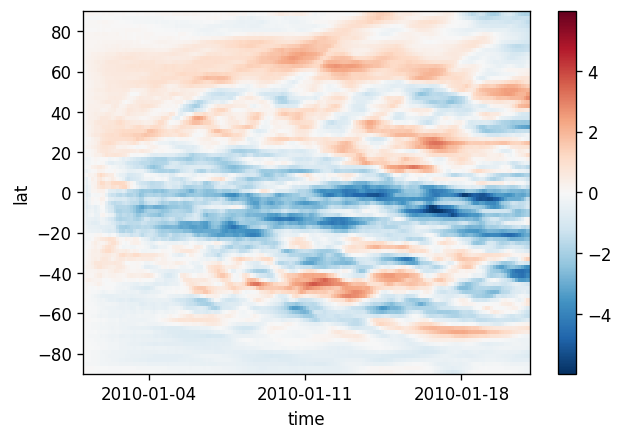

In [45]:
(ml_zonal.VapWaterPath - verif_zonal.water_vapor_path).plot()
plt.title()

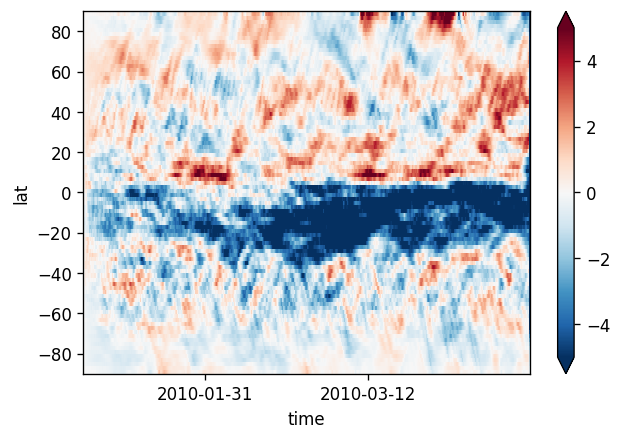

In [15]:
(ml_pr_rad_zonal.VapWaterPath - verif_zonal.water_vapor_path).plot(vmin=-5, vmax=5, cmap="RdBu_r")
plt.title("")
plt.show()

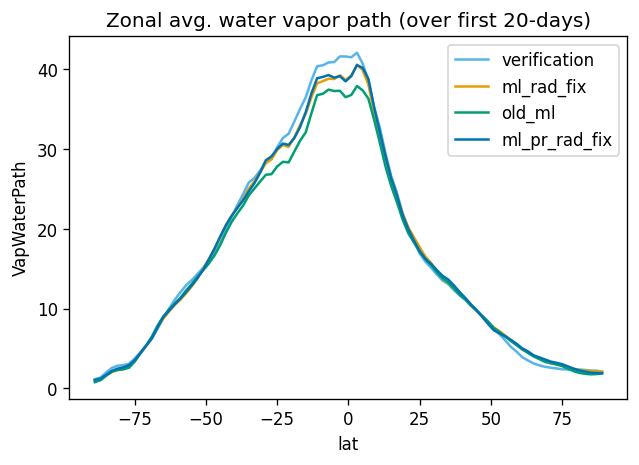

In [12]:
verif_zonal.water_vapor_path.mean(dim="time").plot(label="verification")
ml_zonal.VapWaterPath.mean(dim="time").plot(label="ml_rad_fix")
ml_old_zonal.water_vapor_path.mean(dim="time").plot(label="old_ml")
ml_pr_rad_zonal.VapWaterPath.mean(dim="time").plot(label="ml_pr_rad_fix")
plt.legend()
plt.title("Zonal avg. water vapor path (over first 20-days)")
plt.show()

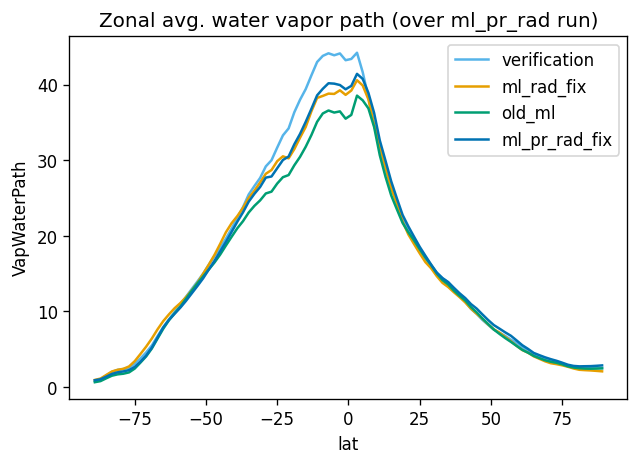

In [16]:
verif_zonal.water_vapor_path.mean(dim="time").plot(label="verification")
ml_zonal.VapWaterPath.mean(dim="time").plot(label="ml_rad_fix")
ml_old_zonal.water_vapor_path.mean(dim="time").plot(label="old_ml")
ml_pr_rad_zonal.VapWaterPath.mean(dim="time").plot(label="ml_pr_rad_fix")
plt.legend()
plt.title("Zonal avg. water vapor path (over ml_pr_rad run)")
plt.show()

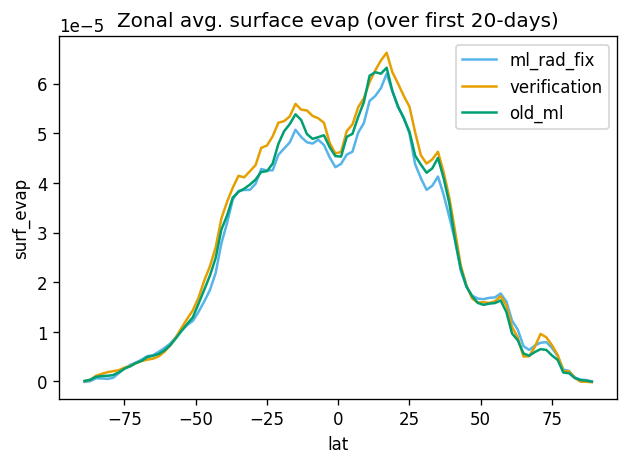

In [50]:
ml_zonal.surf_evap.mean(dim="time").plot(label="ml_rad_fix")
verif_zonal.surf_evap.mean(dim="time").plot(label="verification")
ml_old_zonal.surf_evap.mean(dim="time").plot(label="old_ml")
plt.legend()
plt.title("Zonal avg. surface evap (over first 20-days)")
plt.show()